This project analyzes the Kaggle dataset named, "Company profit and expenditures". Dataset credits due to user @Subham Prasad on kaggle.com. By running basic analysis and plotting variables, hopefully we can figure out some trends and do some predicting.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
from tensorflow import keras
import numpy as np
import io
import sqlite3






In [2]:
data_file=pd.read_csv(r'C:\Users\kaile\Startups-data.csv')
data_file.head(10) # Lets see what the data looks like

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


I'm going to store this table in the sqlite database. This way we easily operate SQL with the dataset.

In [3]:
conn = sqlite3.connect(":memory:")
data_file.to_sql("my_table", conn, index=False, if_exists="replace")
pd.read_sql_query("SELECT * FROM my_table",conn)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
pd.read_sql_query("SELECT State,AVG(Profit) FROM my_table GROUP BY State",conn)

,State,AVG(Profit)
0,California,103905.175294
1,Florida,118774.024375
2,New York,113756.446471


So the average profits state wise was highest in Florida. However the difference is only marginal when comparing all the other states as the maximal difference is only 14,868.84.

In [6]:
#Lets isolate all the numerical columns
data_filenum=data_file[['R&D Spend','Administration','Marketing Spend','Profit']]
data_filenum.sample(10)

,R&D Spend,Administration,Marketing Spend,Profit
2,153441.51,101145.55,407934.54,191050.39
10,101913.08,110594.11,229160.95,146121.95
38,20229.59,65947.93,185265.10,81229.06
42,23640.93,96189.63,148001.11,71498.49
23,67532.53,105751.03,304768.73,108733.99
29,65605.48,153032.06,107138.38,101004.64
17,94657.16,145077.58,282574.31,125370.37
15,114523.61,122616.84,261776.23,129917.04
19,86419.70,153514.11,0.00,122776.86
4,142107.34,91391.77,366168.42,166187.94


In [7]:
data_filenum.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


* Standard deviations for the Reasearch and Development Spending is roughly greater than half the mean. The difference between the minimum and the 25th percentile compared to the difference between the maximum and 75th percentile is roughly half again. This suggests the possibility of few outliers.
* The rest of the columns have a relatively even distribution.
* We have at max 50 counts, so it's a small dataset. We most likely woudn't need to use advanced techniques like keras and pytorch.
Let's get rid of outliers:

In [8]:
new_data=pd.read_sql_query('SELECT [R&D Spend],Administration,[Marketing Spend],Profit FROM my_table WHERE [Marketing Spend] >0',conn) #now we have gotten rid of basic outliers, though in a larger dataset we could use the IQR to further clean the data.


We can now do correlation analysis to find patterns.

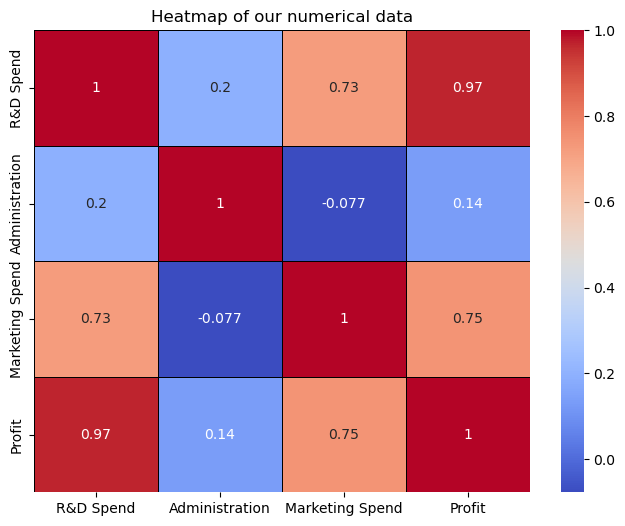

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(new_data.corr(), cmap = "coolwarm", annot = True, linewidths=0.5, linecolor = 'black')
plt.title('Heatmap of our numerical data')
plt.show()

*   When looking at only the profit row, we can see that R&D spending had the highest correlation(0.97), nearly close to 1. Marketing spending has a moderate correlation with profit, with a correlation value of 0.75. Now we can focus on these variables for our prediction. 

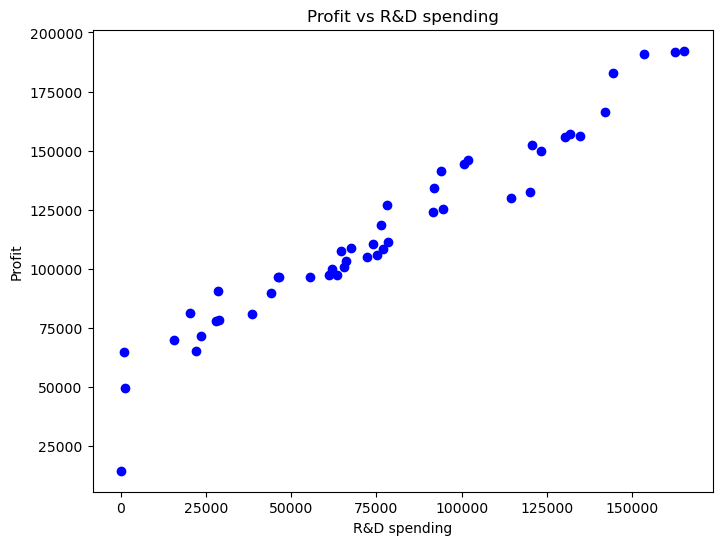

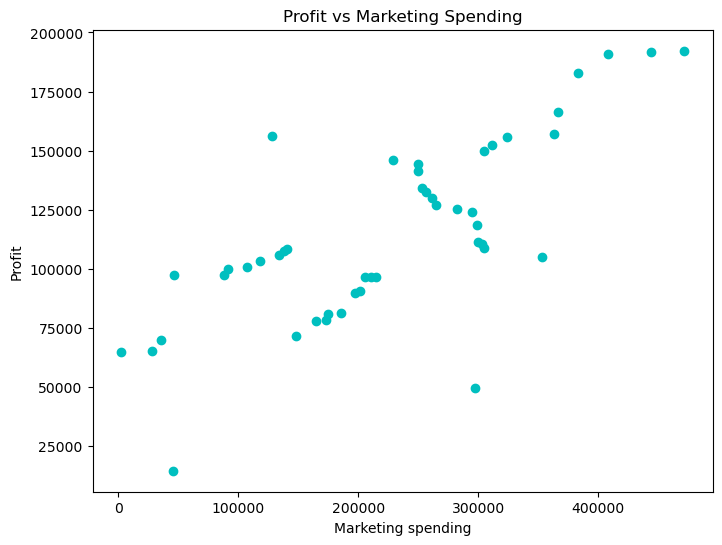

In [11]:
plt.figure(figsize=(8,6))
plt.xlabel('R&D spending')
plt.ylabel('Profit')
plt.title('Profit vs R&D spending')
plt.scatter(new_data[['R&D Spend']],new_data[['Profit']],marker='o',color='b',label='var1')
plt.show()

plt.figure(figsize=(8,6))
plt.xlabel('Marketing spending')
plt.ylabel('Profit')
plt.title('Profit vs Marketing Spending')
plt.scatter(new_data[['Marketing Spend']],new_data[['Profit']],marker='o',color='c',label='var2')
plt.show()



*Both graphs show a relatively linear relationship.To note:R and D spending shows a clear relationship with profit.
We can now try to fit the relations to an equation for predictability.We are going to try several basic models for accuracy.


MODEL1: 
R&D spending affecting profit

In [13]:
dat1 = pd.DataFrame({'X1': new_data['R&D Spend'], 'Y': new_data['Profit']})
X=dat1[['X1']]
Y=dat1[['Y']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
model= LinearRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
R_squared_value=r2_score(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f'The R squared value for model 1 is {R_squared_value}')
print(f'The Mean squared error for model 1 is {mse}')
print(f'The Mean absolute error for model 1 is {mae}')

Coefficients: [[0.83793383]]
Intercept: [50260.69567801]
The R squared value for model 1 is 0.9664140997848448
The Mean squared error for model 1 is 39299316.13681425
The Mean absolute error for model 1 is 5353.29079278454


MODEL2: 
Marketing spending affecting profit

In [14]:
dat1 = pd.DataFrame({'X2': new_data['Marketing Spend'], 'Y': new_data['Profit']})
X=dat1[['X2']]
Y=dat1[['Y']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
model= LinearRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
R_squared_value=r2_score(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f'The R squared value for model 1 is {R_squared_value}')
print(f'The Mean squared error for model 2 is {mse}')
print(f'The Mean absolute error for model 2 is {mae}')

Coefficients: [[0.26779568]]
Intercept: [53082.14410066]
The R squared value for model 1 is 0.39414422654973313
The Mean squared error for model 2 is 708920035.5389713
The Mean absolute error for model 2 is 22132.691145584013


MODEL3: 
Marketing spending and R&D spending influencing profit

In [15]:
dat1 = pd.DataFrame({'X2': new_data['Marketing Spend'],'X1':new_data['R&D Spend'], 'Y': new_data['Profit']})
X=dat1[['X1','X2']]
Y=dat1[['Y']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
model= LinearRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
R_squared_value=r2_score(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f'The R squared value for model 1 is {R_squared_value}')
print(f'The Mean squared error for model 3 is {mse}')
print(f'The Mean absolute error for model 3 is {mae}')

Coefficients: [[0.77455281 0.03258977]]
Intercept: [47661.50848355]
The R squared value for model 1 is 0.9706122994652565
The Mean squared error for model 3 is 34386945.9043938
The Mean absolute error for model 3 is 4356.862579926265


*Interestingly the combined model, aka model-3 seems to be the most appropriate. R squared cannot be used as the sole indicator of model suitability, however there is no doubt that it is indeed a good indicator, especially adjusted R squares. Therefore we should look at other indicators such as the mean squared error and the mean absolute error. After comparing the models with the 3 attributes, we observe that the MSE and MAE is the lowest for model 3.

Predictions

In [81]:
Rd_spend=175000
Mk_spend=500000
while Rd_spend<400000:
    profit=47661.508+ 0.775*(Rd_spend)+ 0.033*(Mk_spend)
    print(f'The predictive profit for R&D spending of {Rd_spend} and Marketing spending of {Mk_spend} is {round(profit,3)}')
    Rd_spend+=25000
    Mk_spend+=25000

The predictive profit for R&D spending of 175000 and Marketing spending of 500000 is 199786.508
The predictive profit for R&D spending of 200000 and Marketing spending of 525000 is 219986.508
The predictive profit for R&D spending of 225000 and Marketing spending of 550000 is 240186.508
The predictive profit for R&D spending of 250000 and Marketing spending of 575000 is 260386.508
The predictive profit for R&D spending of 275000 and Marketing spending of 600000 is 280586.508
The predictive profit for R&D spending of 300000 and Marketing spending of 625000 is 300786.508
The predictive profit for R&D spending of 325000 and Marketing spending of 650000 is 320986.508
The predictive profit for R&D spending of 350000 and Marketing spending of 675000 is 341186.508
The predictive profit for R&D spending of 375000 and Marketing spending of 700000 is 361386.508


KEY TAKEAWAYS:
- Upon initial analysis of location in relation to profit, we do not observe much of a difference between the three areas.
- Two factors stood out in impacting company profits, one is the Spending on Research and Development(R&D) wing and the other is Marketing spending. R&D spending seemed to have much more of a immediate impact than Marketing spending. 
- Upon running three different models in linear regression, it was determined that the best predictive equation for profit is  :                               Profit= 47661.508+ 0.775*(R&D spending)+ 0.033*(Marketing spending).
- As for actionable insights, allocating more funding for Research and Development is beneficial for the company in the long run. If we look at the coefficients of the equation above, we can observe that for 1 unit of spending in R&D we get a profit of 0.775 as opposed to Marketing spending, which for unit, provides a profit of 0.033.